In [ ]:
## perspective transformation


In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt 


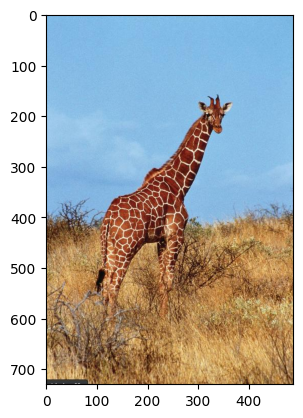

In [3]:
image = cv2.imread("./giraffe.jpg")
image_rgb = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

In [ ]:
rows , cols , _  = image_rgb.shape 
print(rows, cols)

730 488


| Özellik                      | **Affine Transformation**                                | **Perspective Transformation**                                      |
| ---------------------------- | -------------------------------------------------------- | ------------------------------------------------------------------- |
| Matris boyutu                | `2x3`                                                    | `3x3`                                                               |
| Kullanım fonksiyonu          | `cv2.warpAffine()`                                       | `cv2.warpPerspective()`                                             |
| Nokta sayısı                 | En az **3 nokta**                                        | En az **4 nokta**                                                   |
| Perspektif efekti (derinlik) | ❌ Yok                                                    | ✅ Var (g, h değerleriyle)                                           |
| Paralellik korunur mu?       | ✅ Evet                                                   | ❌ Hayır, bozulabilir                                                |
| Matris örneği                | $\begin{bmatrix} a & b & tx \\ c & d & ty \end{bmatrix}$ | $\begin{bmatrix} a & b & c \\ d & e & f \\ g & h & 1 \end{bmatrix}$ |


In [ ]:
import numpy as np
input_points = np.float32(  [[50,50] , 
                            [cols - 50,50] ,
                            [50 , rows-50] ,
                            [cols - 50 , rows-50 ]])

output_points = np.float32(  [[10,100] , 
                            [cols - 100,50] ,
                            [100 , rows-10] ,
                            [cols - 50 , rows-100 ]])

'''
Transformation matix for perspective transformation 
3x3

a,b,c
d,e,f
g,h,1


a,b,c is responsible for horizantal scaling , rotation and translation
d,e,f is responsible for vertical scaling , rotation and translation
g,h  perspective components that account for  depth and skew

'''
M =  cv2.getPerspectiveTransform(input_points ,output_points)
print(M)

[[ 1.08054953e+00  1.62794016e-01 -5.19694302e+01]
 [-1.20195498e-01  1.12679359e+00  5.16475679e+01]
 [ 2.24375415e-04  1.71119123e-04  1.00000000e+00]]


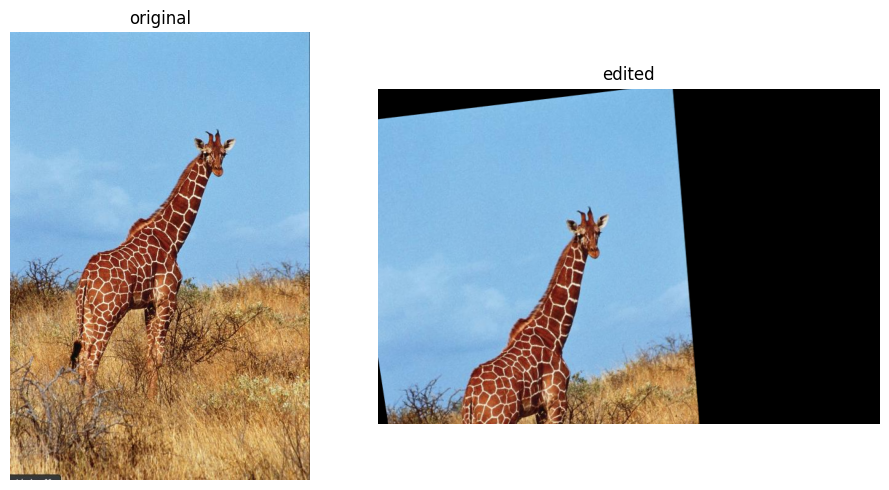

In [11]:
perspective_image = cv2.warpPerspective(image_rgb , M, (rows , cols))
plt.figure(figsize=(10,5 ))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(image_rgb)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("edited")
plt.imshow(perspective_image)
plt.axis("off")
plt.tight_layout()
plt.show()

# affine transformation 

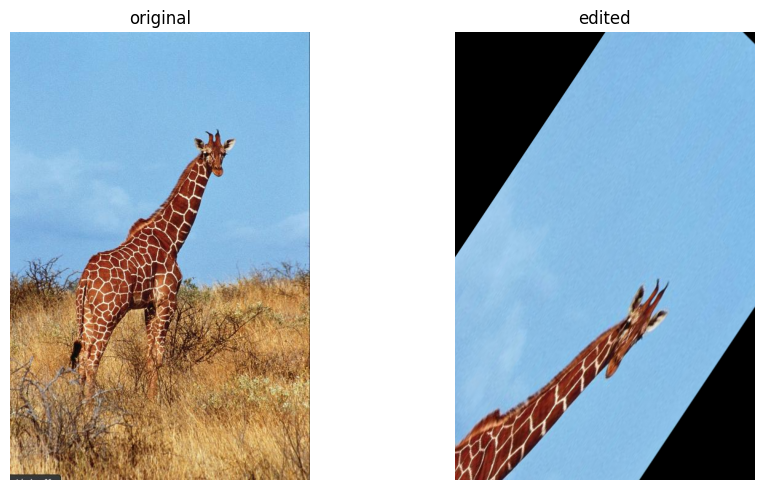

In [17]:
input_points = np.float32([
    [50, 50],
    [200, 50],
    [50, 200]
])

output_points = np.float32([
    [300, 0],     
    [400, 100],  
    [100, 300]   
])

M = cv2.getAffineTransform(input_points , output_points)

affine_image =  cv2.warpAffine(image_rgb , M , (cols , rows))


plt.figure(figsize=(10,5 ))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(image_rgb)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("edited")
plt.imshow(affine_image)
plt.axis("off")
plt.tight_layout()
plt.show()

# Rotation 

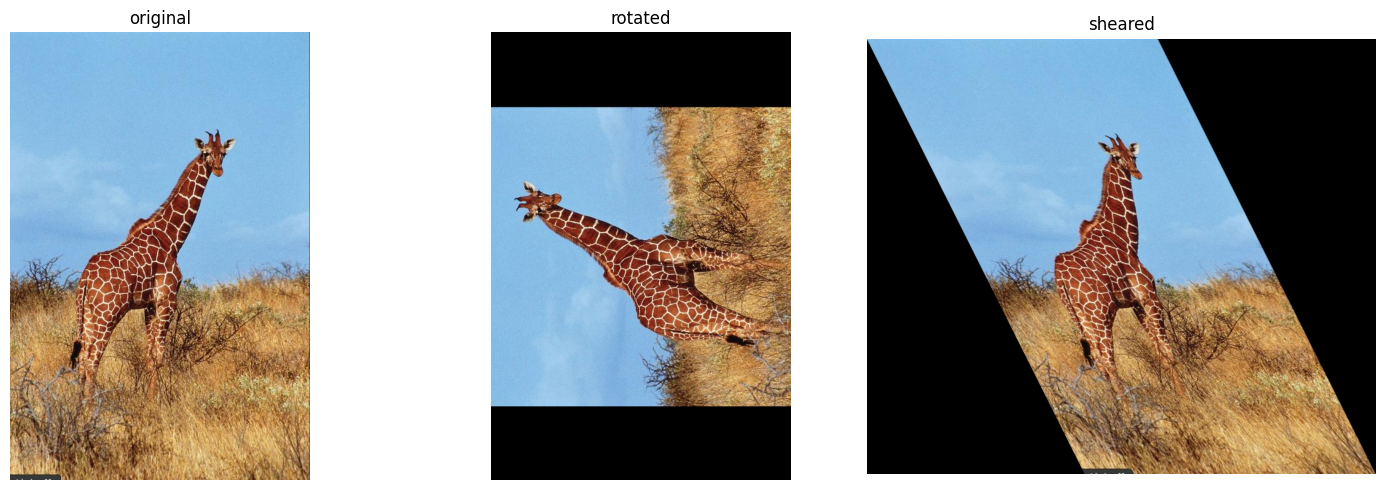

In [27]:
angle = 90 
center = (cols//2 , rows//2)
scale = 1.0

sheare_x , sheare_y = 0.5 , 0


M1 =np.float32([[1,sheare_x, 0],
           [sheare_y , 1, 0]])

M = cv2.getRotationMatrix2D(center , angle ,scale)

rotated_image = cv2.warpAffine(image_rgb , M  , (cols, rows))

sheared_image = cv2.warpAffine(image_rgb , M1  , (cols + int(sheare_x * rows), rows))


plt.figure(figsize=(15,5 ))
plt.subplot(1,3,1)
plt.title("original")
plt.imshow(image_rgb)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("rotated")
plt.imshow(rotated_image)
plt.axis("off")

plt.subplot(1,3,3)
plt.title("sheared")
plt.imshow(sheared_image)
plt.axis("off")
plt.tight_layout()
plt.show()
#editedda crop oldu aşşağısı  çünkü sadece rotate attırmış olduk

# Translation

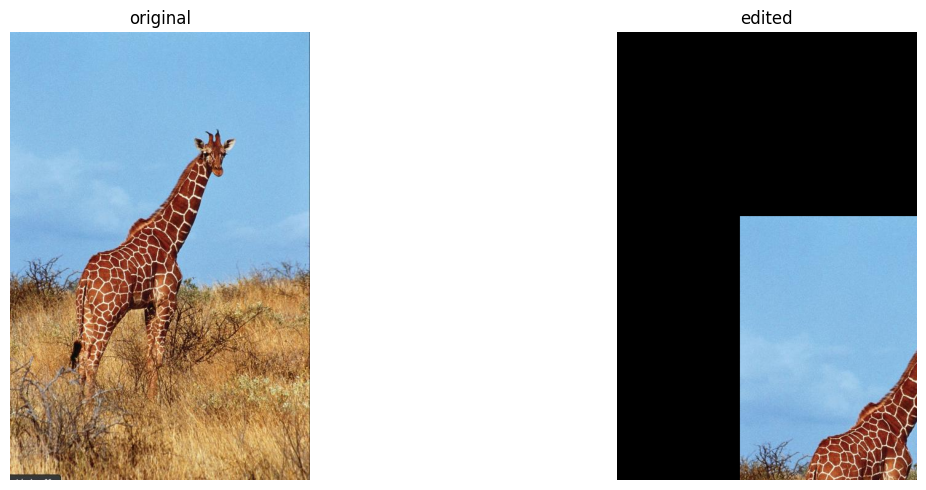

In [28]:
tx , ty = 200 , 300  

M1 =np.float32([[1,0, tx],
           [0 , 1, ty]])

translated_image = cv2.warpAffine(image_rgb ,  M1 , (cols,rows))

plt.figure(figsize=(15,5 ))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(image_rgb)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("edited")
plt.imshow(translated_image)
plt.axis("off")
plt.tight_layout()
plt.show()
